### 오늘 공부 내용
- Web Crawling and Basic Text Analysis
- http://www.cs.virginia.edu/~hw5x/Course/IR2015/_site/docs/PDFs/Crawler%20and%20Text%20Analysis.pdf

collection = corpus 
vocabulary = lexicon

Web Crawler는 ranking이나 indexer에 모두 필요하므로 IR(정보검색)에서 중요한 역할을 한다.
    - ranking: 각 page마다 link를 찾으므로 page link ranking을 낼 수 있다.
    - indexer: 각 page의 단어를 tagging하기 위해서 돌아다녀야한다.


focused crawling이 필요한 이유
    - 나중에 추가

- Browsing: 내가 뭘 찾고 싶은지 모를때.
    - 정보 제공 방식: Push
    - 분류모델
- Querying: 내가 뭘 찾고 싶은지 알때.
    - 정보 제공 방식: Pull

- tokenize
    - 단어, 구, 문장 등 여러가지 방법으로 token을 만들 수 있다.
        - 우리 수업에서 배운 N-gram, Byte Pair Encoding을 쓸 수도 있고, 어제 배운 stanford 형태소분석기를 쓸 수도 있고, 시간/장소를 포함하는 tokenizer도 있고 여러가지 방법이 존재한다.
    - token을 어떻게 만드느냐에 따라서 성능이 달라진다.

### Bag Of Words(BOW)
- 모든 단어는 순서가 상관이 없고 서로 independent하다는 가정
- 컴퓨터가 이해할 수 있는 형태의 매트릭스
- 장점: 설계하기 쉽고 만들기 간단하다.
- 단점: 순서가 반영되지 않으므로, 문법적인 요소를 다 잃어버린다. 단, 문서가 엄청나게 많으면 패턴이 많이 등장해서 단점이 극복될 수 있다.
    - NLP 쪽은 그래서 확률통계 기반 모델이 많다.
    - 순수 NLP 쪽은 문법적인 요소를 무시할 수 없으므로 시간 순서가 중요하다. RNN 등의 딥러닝 쪽으로 시도할 수 있다.

document term matrix (DTM)
- Bag of words로 만든 모델?

### full text indexing(전문 색인)

- N-gram을 사용하면 장점: 문맥을 고려할 수 있게 된다.
- N-gram을 사용하면 단점: token 수가 너무 많이 늘어난다.
- 해결책 1: 현질(메모리, 코어 등..)-최근에는 컴퓨팅능력(time complexity, space complexity)은 문제가 아니게 됨.
- 해결책 2: Construct controlled vocabulary
    - 모든 단어가 아니라 조금 줄이자.
    - zipf's law를 이용해서 상위 20개 빈도 단어만 삭제해도 엄청난 수의 단어가 줄어들 것이다. (구조상 필요하고 의미를 갖지 않는 of, the 같은 단어들)
    - zipf's law를 이용해서 하위 저빈도 단어도 삭제
    - stopword(불용어) 처리
    - stemming(어간 추출)로 의미있는 단어만 살리기
    - lemantation?
    - 신조어 처리
    - 한글은 음절의 길이도 중요하다
    - 영어에서는 .lower로 대소문자를 통일시켰음.

### Normalization
- 사람이 해야한다. (컴퓨터가 해줄 수 없는 부분)
- .lower() 소문자로 통일
- 여러가지 표현을어떻게 표준화 시킬 것인지
    - U.S.A를 USA로 인식시키기 위해서 .을 지워버리면 문장의 마침표도 사라지는 문제가 생긴다.
- 결국, 데이터를 보고 데이터에 따라서 연구자가 Normalization 정책을 결정해야한다.

### Automatic text indexing
- 현대는 컴퓨팅 파워가 좋으니, 문법적 손실이 생길 위험을 감수하지말고 데이터를 다 쓰자. 
- modern IR

### NER(named entity recognition)
- 어제 다운 받은 stanford 형태소 분석기 압축 파일 중에 있다.
- 국문 버전은 etri에 있다.
- Automatic text indexing에서 최근에 성능이 좋은 방법.
- 전문색인에서 사용한다.(Full Automatic Text Indexing)

- http://www.cs.virginia.edu/~hw5x/Course/IR2015/_site/docs/PDFs/Inverted%20Index.pdf

DTM(?)의 단점
- 3페이지
- query term에서 단어들을 다 한번씩 찾아본다.
- document는 엄청 많을 것이므로, 메모리에 다 올릴 수가 없어서 하나씩 열어보고 일치하는 단어가 있으면 candidtate에 추가한다. 
- document가 1000000개라고 하면 100000번 열어보므로 시간이 오래 걸릴 것이다.
- query term이 길수록(검색 단어가 길수록) 오래 걸린다. query term의 길이만큼 문서를 열어봄
- 각 단어에 대한 candidte를 교집합하거나 합집합해서 결과를 만든다.

In [8]:
# 얼마나 비효율적인가 봅시다.

from konlpy.corpus import kobill
from konlpy.tag import Kkma

Collction = dict()
for _ in kobill.fileids():
    Collction[_] = kobill.open(_).read()
    
kkma = Kkma()
Vocabulary = list()
for d, t in Collction.items():
    Vocabulary.extend([_ for _ in kkma.morphs(t) 
                       if 1 < len(_) < 7])
    
Vocabulary = list(set(Vocabulary))

In [14]:
len(Vocabulary)

1155

In [15]:
t2i = lambda t: Vocabulary.index(t)
i2t = lambda i:Vocabulary[i]

In [16]:
# morphs는 품사태그 없이 반환함.

Kkma().morphs("안녕하세요")

['안녕', '하', '세요']

In [17]:
DocumentRepresentation = list(
    list(0 for _ in range(len(Vocabulary)))
for _ in range(len(Collction)))

In [18]:
len(DocumentRepresentation), \
len(DocumentRepresentation)

(10, 10)

In [19]:
d2i = lambda d: list(Collction.keys()).index(d)
i2d = lambda i: list(Collction.keys())[i]

In [22]:
for d, t in Collction.items():
    row = d2i(d)
    for _ in kkma.morphs(t):
        if _ in Vocabulary:
            col = t2i(_)
            DocumentRepresentation[row][col] = 1

In [25]:
sum(DocumentRepresentation[0])

271

In [48]:
Query = "법안 의원"
QueryRepresentation = list(0 
                           for _ in range(len(Vocabulary)))
for _ in kkma.morphs(Query):
    print(_)
    if _ in Vocabulary:
        col = t2i(_)
        QueryRepresentation[col] = 1

법안
의원


In [49]:
# O(4 * 10 * 1144)
CandidateList = list()
for i in range(len(Vocabulary)):
    if QueryRepresentation[i] == 1:
        tempCandidate = []
        
        # bottle neck 구간
        for d in range(len(Collction)):
            for t in range(len(Vocabulary)):
                if DocumentRepresentation[d][t] == 1 and \
                t == i:
                    tempCandidate.append(i2d(d))
                    break
        # bottle neck 구간
        CandidateList.append(tempCandidate)

In [50]:
CandidateList

[['1809890.txt',
  '1809891.txt',
  '1809892.txt',
  '1809893.txt',
  '1809894.txt',
  '1809895.txt',
  '1809896.txt',
  '1809899.txt'],
 ['1809890.txt', '1809891.txt', '1809892.txt', '1809893.txt']]

In [51]:
resultList = CandidateList[0]
for _ in CandidateList[1:]:
    resultList = list(set(resultList).intersection(_))
resultList

['1809891.txt', '1809890.txt', '1809892.txt', '1809893.txt']

> 검색 결과에서 relevant를 알 수 가 없다. ranking을 매길 수가 없다.
>
> 최신순, 가나다 순으로 밖에 정렬할 수 없다.

> 지금은 문서양이 얼마 없어서 빨라보이지만 굉장히 느린 시스템이다. 
>
> timeit해보면 알 수 있다.

### inverted indexing(역 색인)
 
TDM(Term Document Matrix)
    - 단어에 대하여 등장한 document를 매칭한다.
    - Query를 미리 정해둔다.
    - time complexity가 linear하게 나온다. 

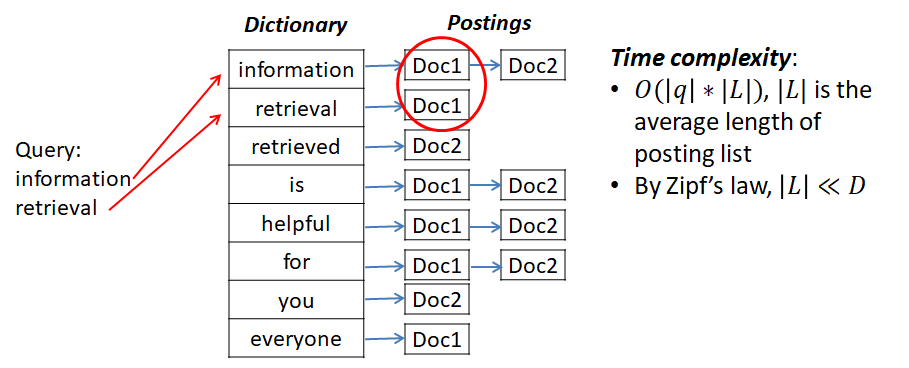

In [55]:
# 위에서 만든 DTM을 TDM으로 바꿔봅시다.

TDM = [list() for _ in range(len(Vocabulary))]
for d, t in Collction.items():
    row = d2i(d)
    for _ in kkma.morphs(t):
        if _ in Vocabulary:
            col = t2i(_)
            if row not in TDM[col]:
                TDM[col].append(row)

In [56]:
TDM[t2i("규제")]

[6]

In [60]:
# O(4 * |L|)
CandidateList = list()
for q in [_ for _ in kkma.morphs(Query)
         if _ in Vocabulary]:
    tempCandidate = []
    CandidateList.append([i2d(_) for _ in TDM[t2i(q)]])

In [61]:
resultList = CandidateList[0]
for _ in CandidateList[1:]:
    resultList = list(set(resultList).intersection(_))
resultList

['1809891.txt', '1809890.txt', '1809892.txt', '1809893.txt']

stay in memory
- hash table
- B-tree(balanced tree)
- trie(tree 구조인데, 자식이 2개 이상/tree는 원래 자식이 2개)

### linked list
- TDM에서 posting은 디스크에 따로 둔다. (메모리에 올리지 않아도 됨)
- 포인터 개념으로 posting에 효율적인 액세스 구조

### map reduce
- 분산처리
- 구글이 만듦
- 